Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
file_path = 'train_data.xlsx'
df = pd.read_excel(file_path, sheet_name='Train')

In [5]:
df.head()

customer_id transaction_date sub_grade        term home_ownership  \
0     10608026       2014-01-01        C5   36 months       MORTGAGE   
1     10235120       2014-01-01        E5   36 months       MORTGAGE   
2     10705805       2014-01-01        D2   36 months       MORTGAGE   
3     11044991       2014-01-01        B4   36 months       MORTGAGE   
4     10161054       2014-01-01        C3   60 months       MORTGAGE   

   cibil_score  total_no_of_acc  annual_inc  int_rate             purpose  \
0          665                9     70000.0     16.24  debt_consolidation   
1          660                8     65000.0     23.40    home_improvement   
2          660                7     73000.0     17.57               other   
3          690                5    118000.0     12.85  debt_consolidation   
4          665                5     63000.0     14.98  debt_consolidation   

   loan_amnt application_type  installment verification_status  account_bal  \
0       7200       Individual       253.99            Verified         4648   
1       6000       Individual       233.52     Source Verified        14051   
2       8000       Individual       287.50            Verified        14885   
3      10000       Individual       336.22     Source Verified         7542   
4      10000       Individual       237.80            Verified         6318   

   emp_length  loan_status  
0          11            0  
1          11            1  
2          11            0  
3           2            1  
4          11            0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113705 non-null  float64       
 13  verification_s

In [9]:
df.shape

(113705, 17)

In [12]:
df.describe()

customer_id               transaction_date    cibil_score  \
count  1.137050e+05                         113705  113705.000000   
mean   4.359137e+07  2015-03-04 22:24:20.769535232     684.398707   
min    3.630090e+05            2014-01-01 00:00:00     660.000000   
25%    2.509597e+07            2014-08-01 00:00:00     665.000000   
50%    4.504932e+07            2015-04-01 00:00:00     680.000000   
75%    6.134344e+07            2015-10-01 00:00:00     695.000000   
max    7.615383e+07            2016-03-01 00:00:00     845.000000   
std    2.016104e+07                            NaN      22.871241   

       total_no_of_acc    annual_inc       int_rate      loan_amnt  \
count    113705.000000  1.137050e+05  113705.000000  113705.000000   
mean          0.272934  7.138822e+04      15.955469   15158.144980   
min           0.000000  0.000000e+00      12.050000    1000.000000   
25%           0.000000  4.300000e+04      13.330000    8000.000000   
50%           0.000000  6.000000e+04      14.990000   13300.000000   
75%           0.000000  8.500000e+04      17.860000   20225.000000   
max          10.000000  8.900060e+06      28.990000   40000.000000   
std           0.647328  6.050616e+04       3.234215    9091.279851   

         installment    account_bal     emp_length    loan_status  
count  113705.000000  113705.000000  113705.000000  113705.000000  
mean      454.241150   15820.487094       5.959782       0.738895  
min        33.240000       0.000000       0.000000       0.000000  
25%       265.740000    5656.000000       2.000000       0.000000  
50%       388.290000   10841.000000       6.000000       1.000000  
75%       599.530000   19682.000000      11.000000       1.000000  
max      1460.430000  875598.000000      11.000000       1.000000  
std       268.251678   20447.614824       4.229570       0.439239

In [13]:
df.isnull().sum()

customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [11]:
# Identify Numerical and Categorical Columns
def identify_columns(df):
    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    date_cols = df.select_dtypes(include=['datetime']).columns.tolist()
    print("Numerical Columns:", numerical_cols)
    print("Categorical Columns:", categorical_cols)
    print("Date Columns:", date_cols)
    return numerical_cols, categorical_cols, date_cols

numerical_cols, categorical_cols, date_cols = identify_columns(df)

Numerical Columns: ['customer_id', 'cibil_score', 'total_no_of_acc', 'annual_inc', 'int_rate', 'loan_amnt', 'installment', 'account_bal', 'emp_length', 'loan_status']
Categorical Columns: ['sub_grade', 'term', 'home_ownership', 'purpose', 'application_type', 'verification_status']
Date Columns: ['transaction_date']


non-default: paid the loan,
default: failed to pay the load

<ipython-input-4-91dca5136958>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette='coolwarm')


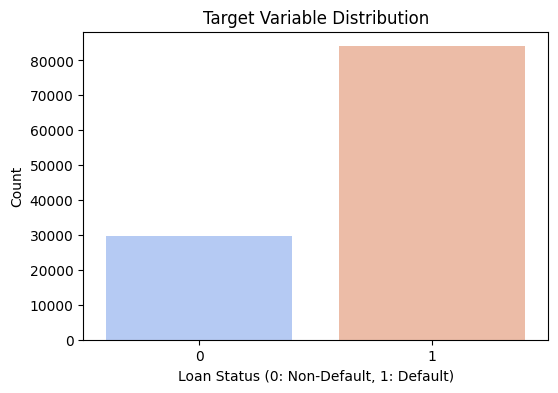

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=df, palette='coolwarm')
plt.title("Target Variable Distribution")
plt.xlabel("Loan Status (0: Non-Default, 1: Default)")
plt.ylabel("Count")
plt.show()

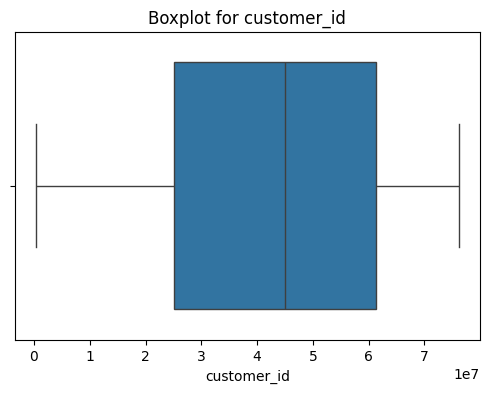

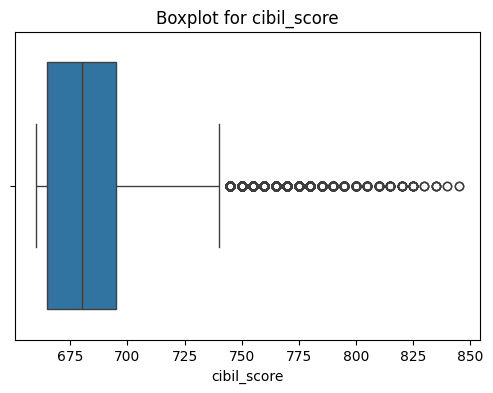

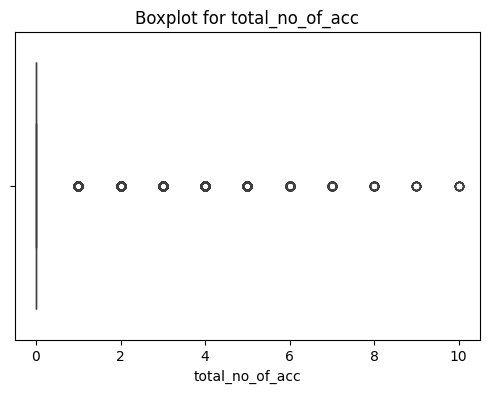

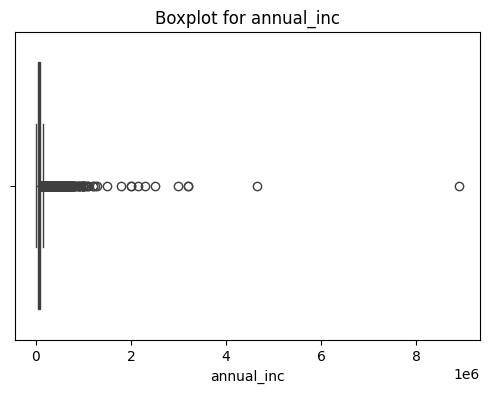

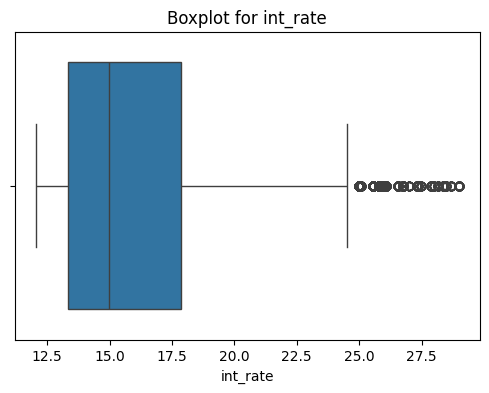

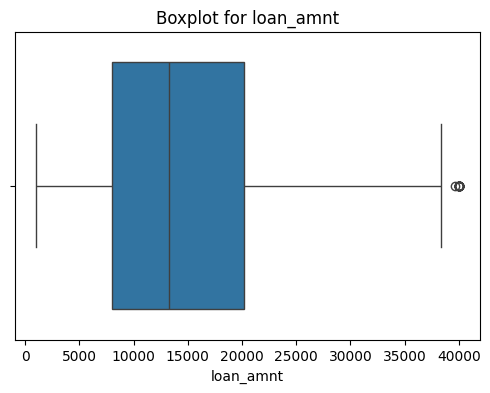

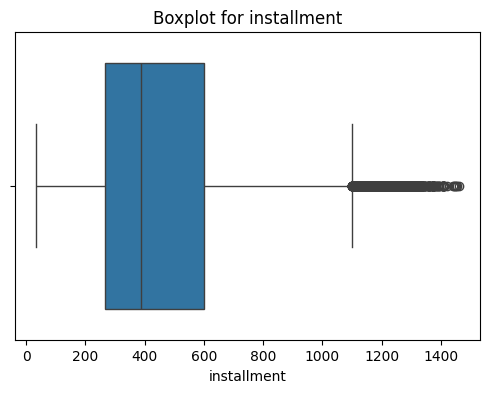

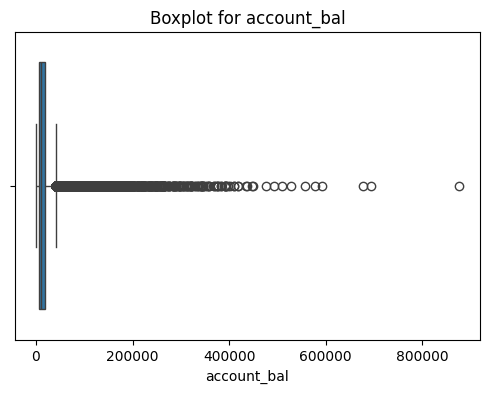

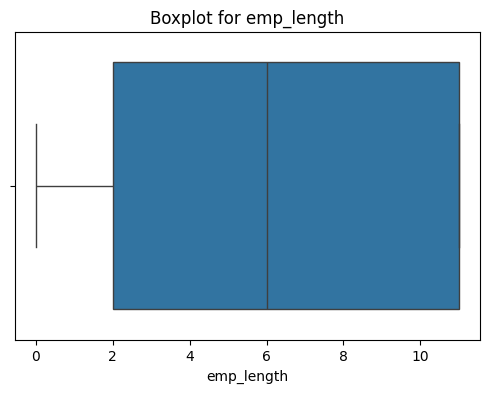

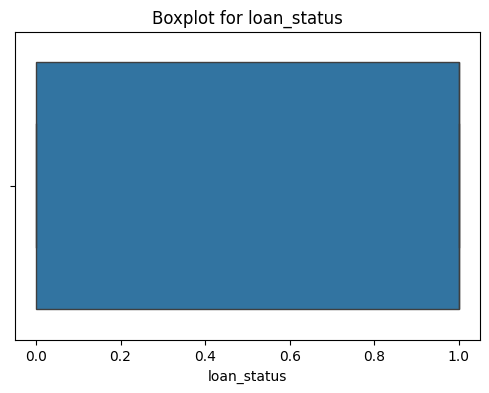

In [15]:
# Boxplot for outliers
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

# Example of capping outliers
for col in numerical_cols:
    q1, q3 = df[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = np.clip(df[col], lower_bound, upper_bound)


<ipython-input-18-4cddb9711f34>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


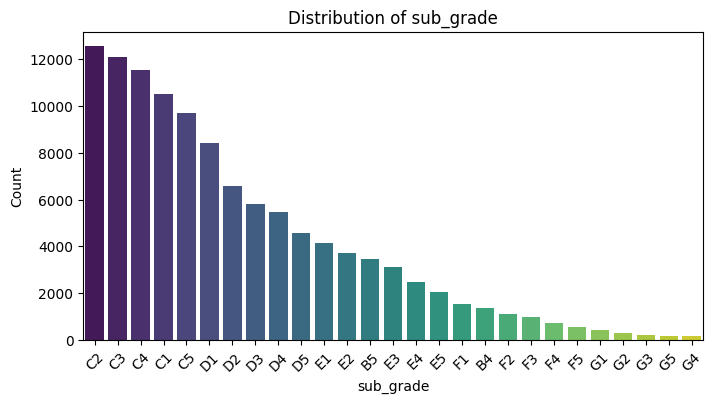

<ipython-input-18-4cddb9711f34>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


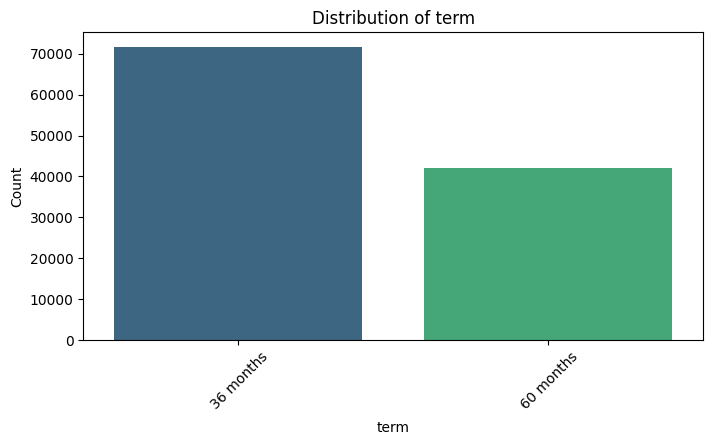

<ipython-input-18-4cddb9711f34>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


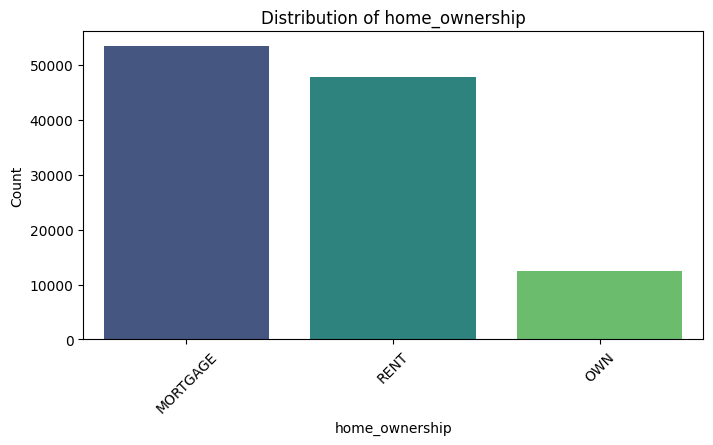

<ipython-input-18-4cddb9711f34>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


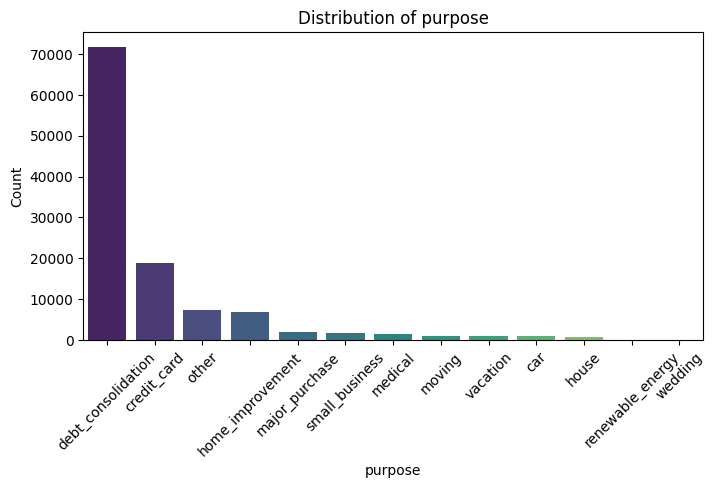

<ipython-input-18-4cddb9711f34>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


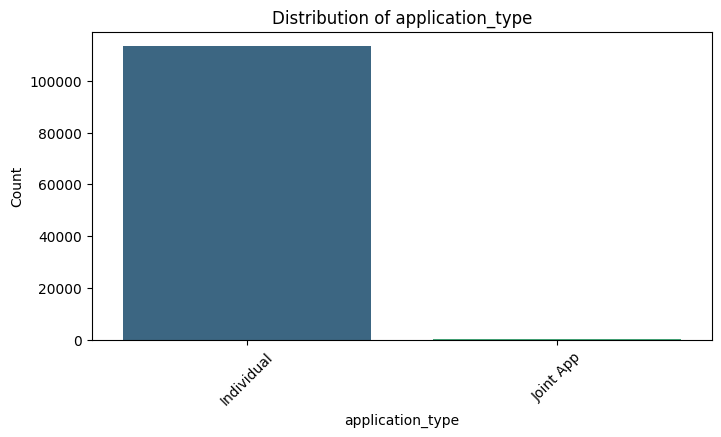

<ipython-input-18-4cddb9711f34>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)


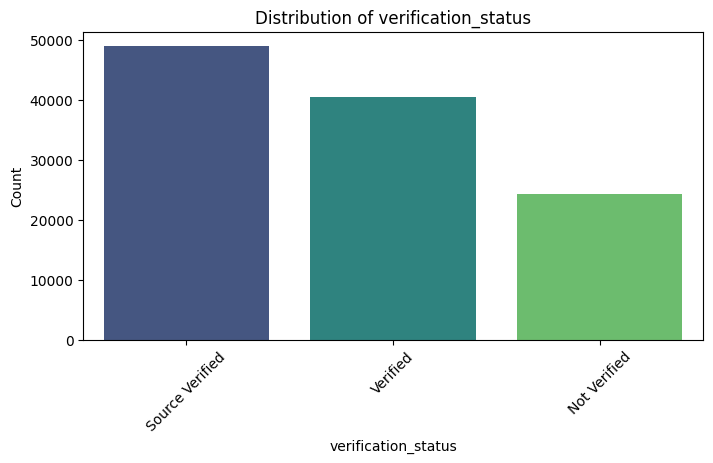

In [18]:
# Bar plots for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, palette='viridis', order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

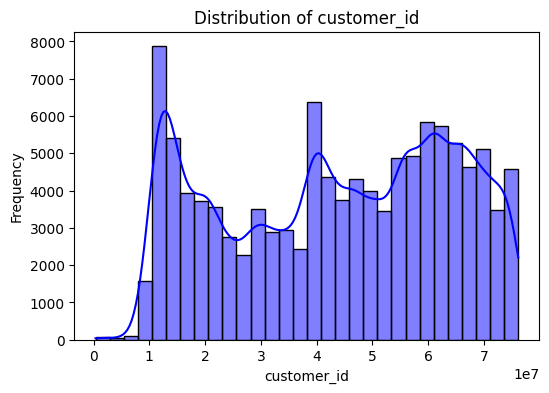

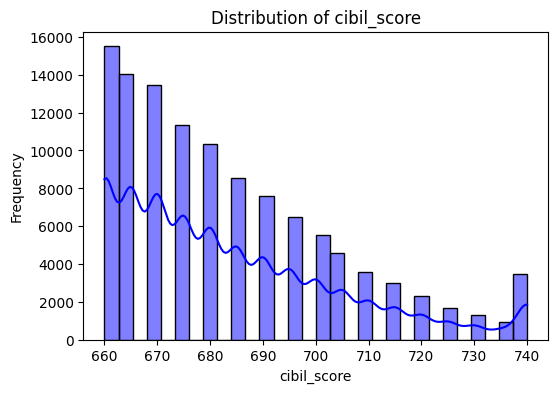

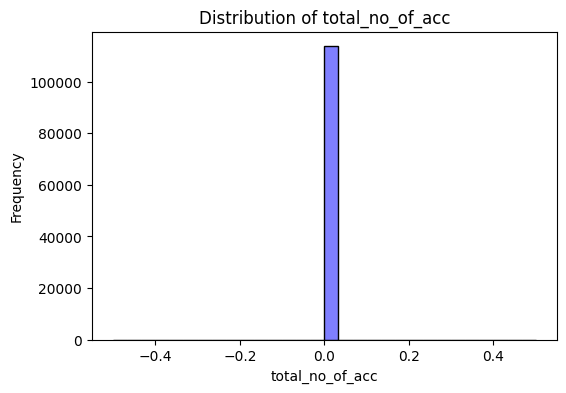

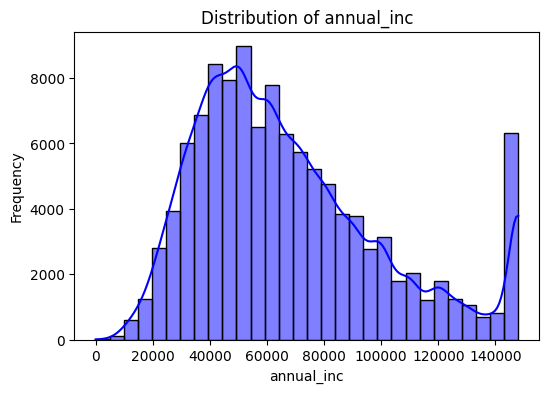

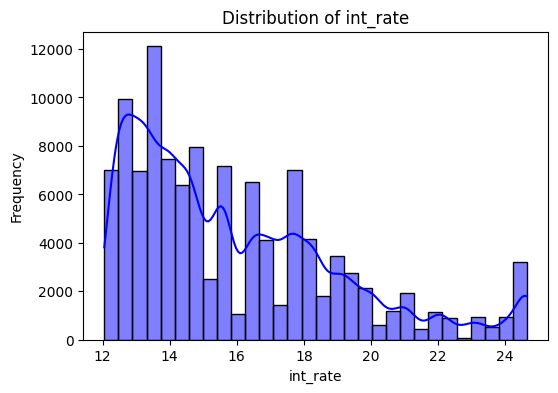

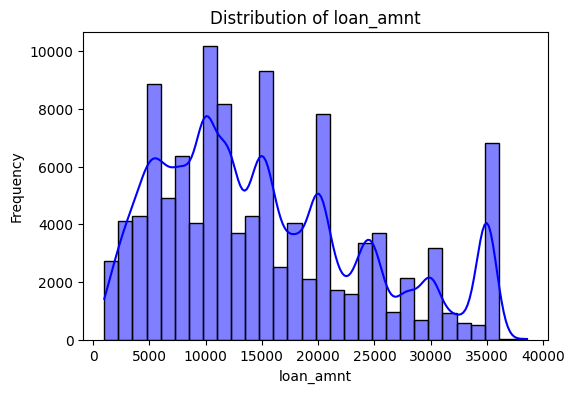

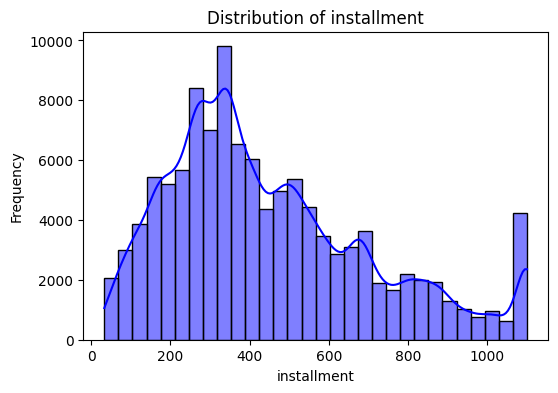

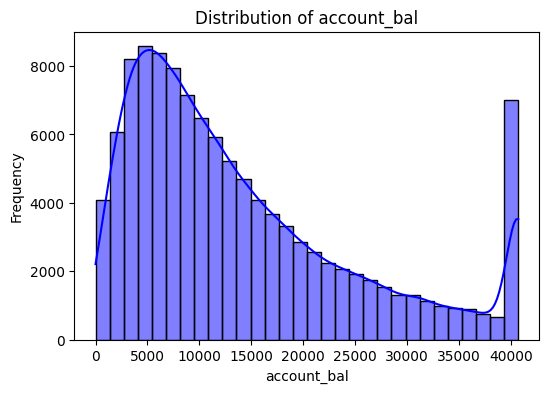

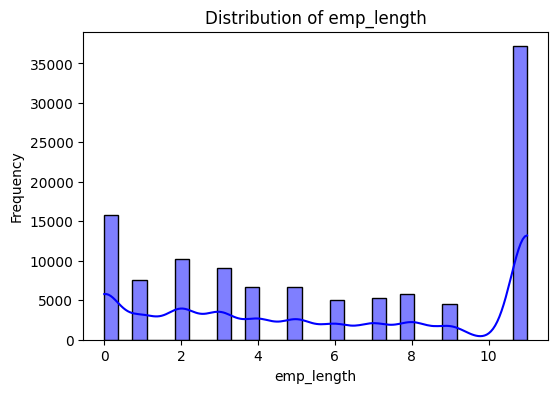

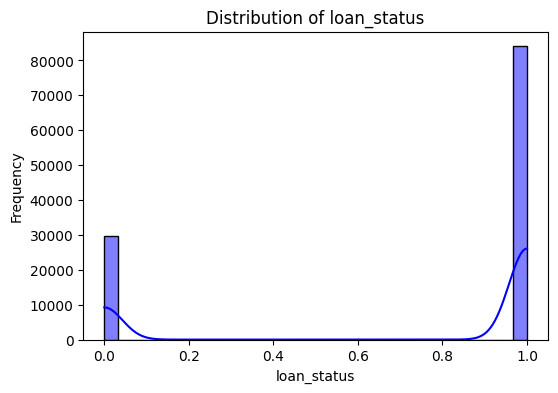

In [16]:
# Histograms for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

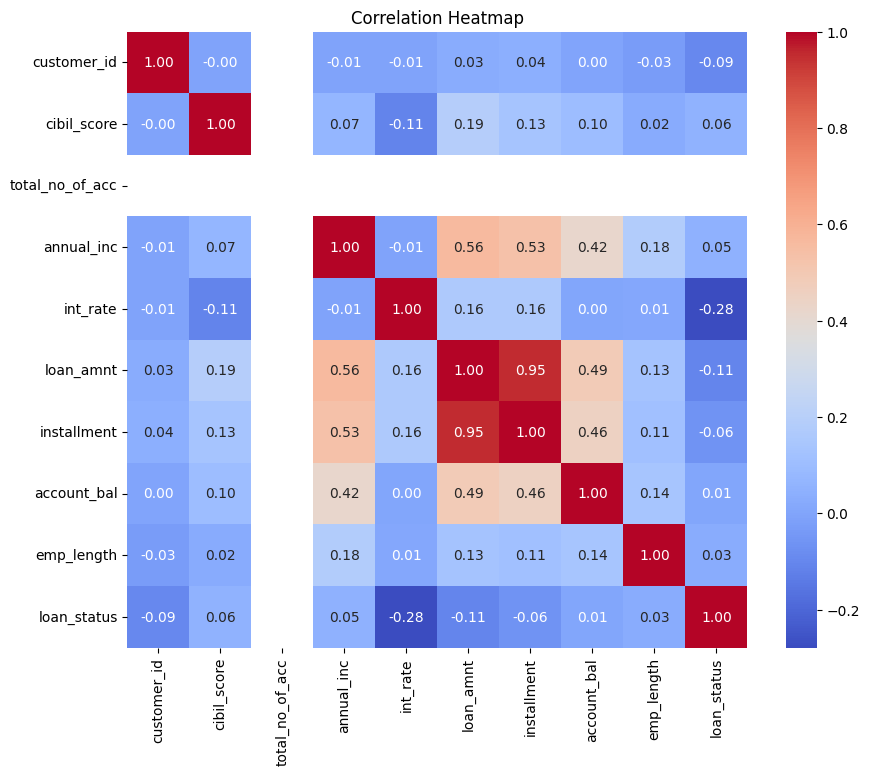

In [17]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

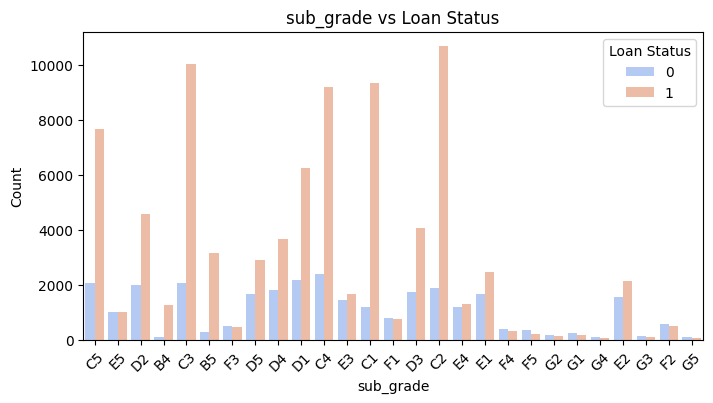

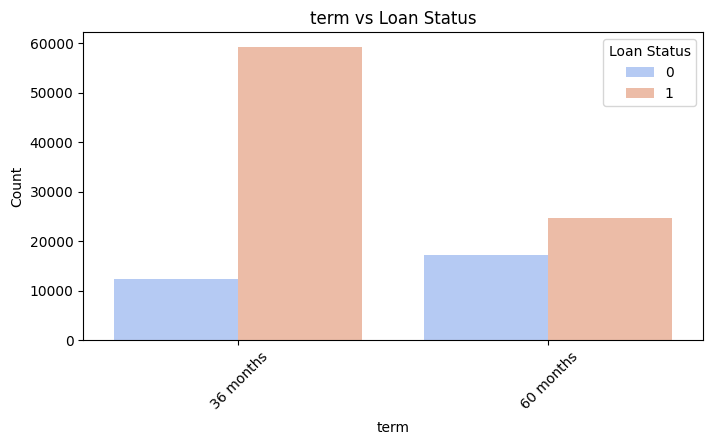

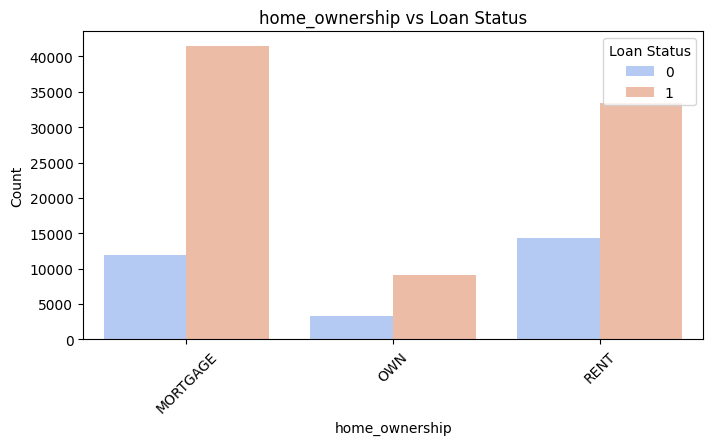

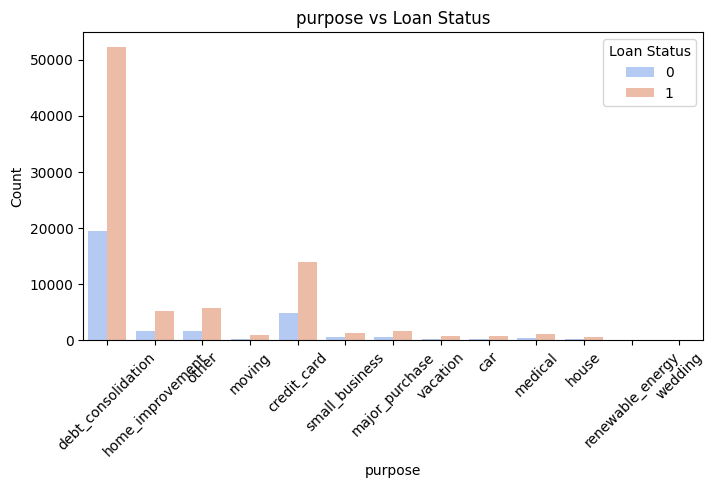

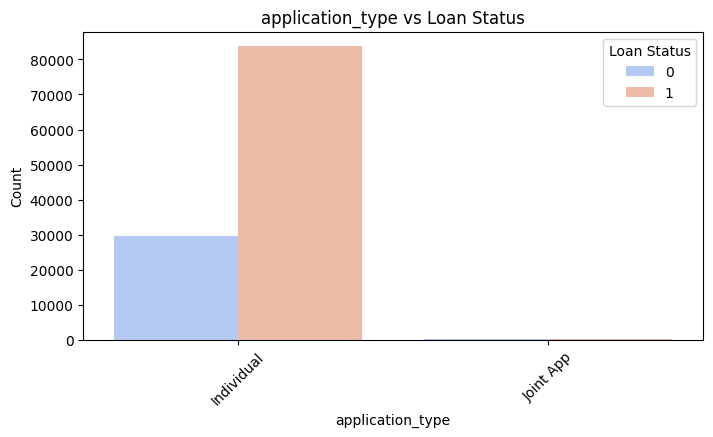

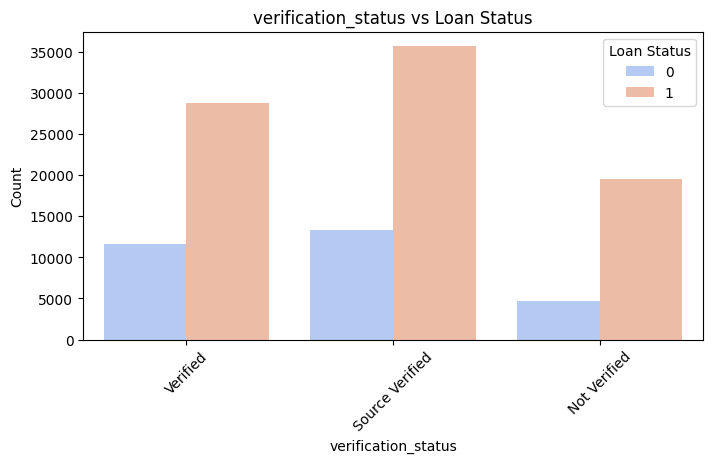

In [19]:
# Analyze relationship with target
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='loan_status', data=df, palette='coolwarm')
    plt.title(f"{col} vs Loan Status")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title="Loan Status", loc='upper right')
    plt.show()

In [23]:
# Date-based Analysis
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month

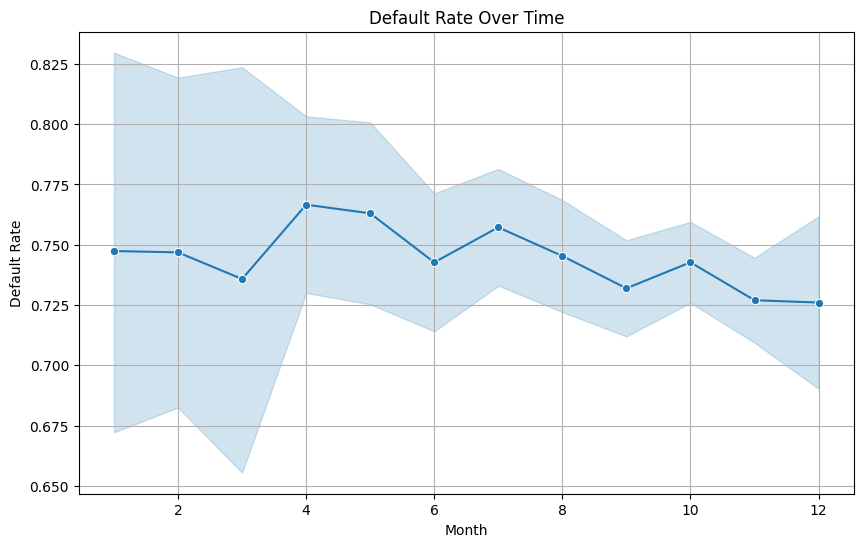

In [24]:
# Trends over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='loan_status', data=df.groupby(['year', 'month'])['loan_status'].mean().reset_index(), marker='o')
plt.title("Default Rate Over Time")
plt.xlabel("Month")
plt.ylabel("Default Rate")
plt.grid()
plt.show()

In [27]:
# Calculate Loan to Income Ratio
df['loan_to_income_ratio'] = df['loan_amnt'] / df['annual_inc']
# Display the first few rows to verify the new column
print("Loan to Income Ratio:")
print(df[['loan_amnt', 'annual_inc', 'loan_to_income_ratio']].head())

Loan to Income Ratio:
   loan_amnt  annual_inc  loan_to_income_ratio
0     7200.0     70000.0              0.102857
1     6000.0     65000.0              0.092308
2     8000.0     73000.0              0.109589
3    10000.0    118000.0              0.084746
4    10000.0     63000.0              0.158730
